In [1]:
import numpy as np
import run_continuum as run
import matplotlib.pyplot as plt
import scipy.signal

Run an example to show the transition from crack-like to pulse-like propagation

/Users/kjetilthogersen/.pyenv/versions/3.7.2/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
/Users/kjetilthogersen/.pyenv/versions/3.7.2/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


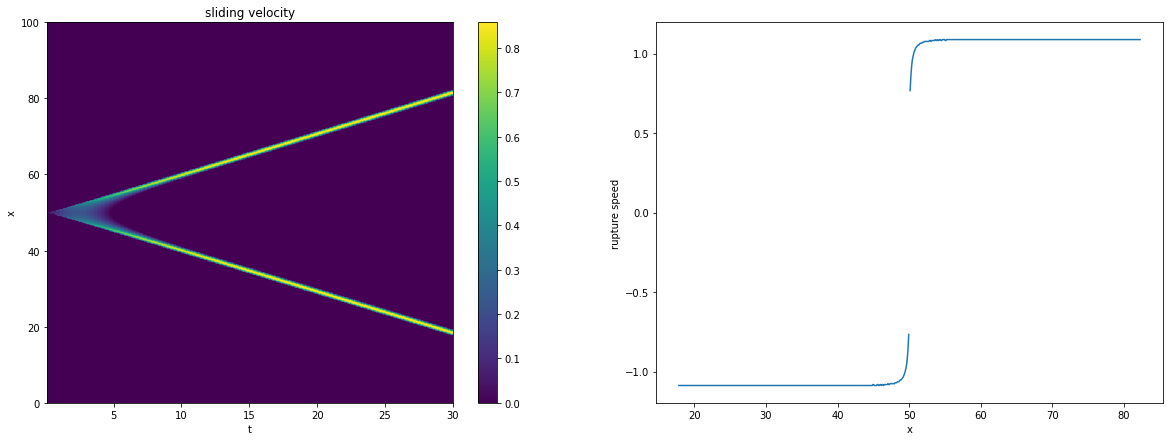

In [2]:
x = np.linspace(0,100,1000)
dt = 1e-3
tmax = 30
gamma = 0.65
beta = 0.01
tau = 0.3*np.ones(np.size(x))
tau[500]=1
output_interval = 100

data = run.run_continuum(x = x, tau = tau, tau_minus = tau+2, dt = dt, output_interval = output_interval, gamma = gamma, tmax = tmax, beta = beta)

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.pcolor(data['t'],x,data['v'])
plt.ylabel('x')
plt.xlabel('t')
plt.title('sliding velocity')
plt.colorbar()

plt.subplot(1,2,2)
plt.plot(x,np.gradient(x)/np.gradient(data['unstickTime']))
plt.ylabel('rupture speed')
plt.xlabel('x')

plt.show()

Now set up rupture from one side so that the boundary acts as a barrier (this is directly coded in run_continuum).

We will use this to find out how to predict rupture arrest, as well as final slip profile.

In [10]:
# Create a small dataset with different decaying taubar

dt = 1e-2
tmax = 100
gamma = 0.65
beta = 0.01
output_interval = 100
N_runs = 9

for runInd in range(N_runs):
    
    x = np.linspace(0,100*float(np.random.rand(1)+.2),1000)

    # Create tau from correlated noise:
    correlation_scale = 1+np.random.rand(1)*2
    filter_kernel = np.exp(-(x-np.max(x)/2)**2/(2*correlation_scale))
    filter_kernel = filter_kernel/np.sum(filter_kernel)
    noise = np.random.randn(np.size(x))
          
    noise = scipy.signal.convolve(noise, filter_kernel, mode='same')
    noise = noise-np.min(noise); noise = noise/np.max(noise)
    randMod = np.random.rand(1)
    tau = randMod*noise+(1-randMod)-(x/np.max(x)) # Add linear background to noise
    tau[0:1]=1

    # run
    data[runInd] = run.run_continuum(x = x, tau = tau, tau_minus = tau+2, dt = dt, output_interval = output_interval, gamma = gamma, tmax = tmax, beta = beta)

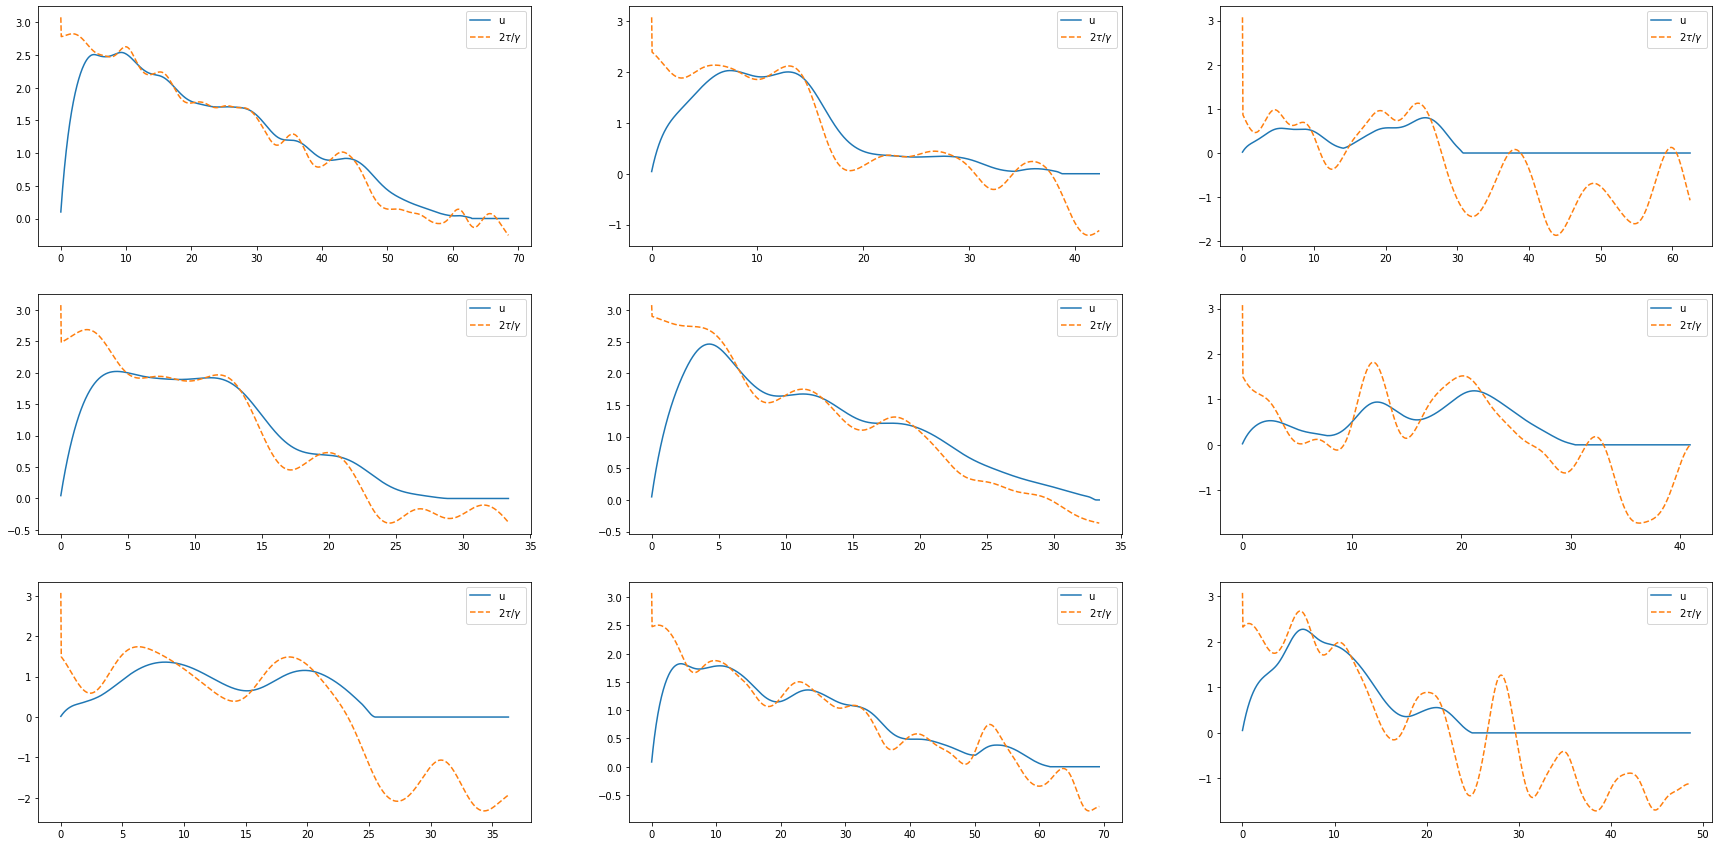

In [11]:
# Plot final slip
plt.figure(figsize=(30,15))
for runInd in range(N_runs):
    plt.subplot(3,int(np.ceil(N_runs/3)),runInd+1)
    plt.plot(data[runInd]['x'],data[runInd]['u'][:,-1],label='u')
    plt.plot(data[runInd]['x'],2*data[runInd]['tau']/data['gamma'],label='$2\\tau/\\gamma$',linestyle='--')
    plt.legend()
plt.show()

The final slip has above been compared to the slip assuming steady state at all times: $2\tau/\gamma$ (this comes from steady state solution of slip pulse).

Already from this it is quite clear that the final slip distribution will at least in some form resemble the initial shear stress. For small spatial variations in prestress, this prediction is atually fairly accurate.

The first order prediction assuming slowly varying prestress of where the pulse will arrest is the first point where the non-dimensional prestress drops below zero, which is a very local criteraion.



